# **Feature Extraction and Price Prediction for Mobile Phones**


**Problem Statement**
- I worked for a prominent organization that specializes in selling mobile phones. The organization is keen to enhance its pricing strategy by gaining a deeper understanding of the key features that influence the prices of mobile phones in today's highly competitive market. my objective is to build a predictive model that can accurately estimate the price of a mobile phone based on its features. To achieve this, you'll perform a feature extraction analysis to identify the most influential features.



**Project Description:**
- In this project, I worked with a dataset that contains detailed information about various mobile phones, including their model, color, memory, RAM, battery capacity, rear camera specifications, front camera specifications, presence of AI lens, mobile height, processor, and, most importantly, the price.
- My goal is to develop a predictive model for mobile phone prices.


**Data Wrangling**
- It convert and format raw data to usable format down to data science pipeline

# **Data Exploration:**

**Import Libraries**

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


**Loading the given Dataset**

In [47]:
data=pd.read_csv('/content/Processed_Flipdata - Processed_Flipdata (1).csv')

In [48]:
data # to check data

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


**Check the shape of data**

In [49]:
data.shape[0]#only no of rows

541

In [50]:
data.shape[1]#only no of columns

12

**Check first five Rows**

In [51]:
data.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


**Check all the column names of dataset**

In [52]:
data.columns

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Prize'],
      dtype='object')

**check info of dataset**

In [53]:
# Getting the informaatin of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


**Descriptive Statistics**

**Summary Statistics**
- **Measure of central Tendancy**
- **Mean**: Mean is the average of all values
- **mode**: Median is the middle value when data is sorted.
-**Median** : Mode is the most frequently occurring value in the dataset.
-**Describe()** is used to view some basic statistical details like percentile, mean, std, etc. of a data frame or a series of numeric values.

In [54]:
data.describe(include='all')

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
count,541.000000,541,541,541.000000,541.000000,541.000000,541,541,541.000000,541.000000,541,541
unique,NaN,187,275,NaN,NaN,NaN,14,13,NaN,NaN,123,158
top,NaN,vivo Y16,Yellow,NaN,NaN,NaN,50MP,16MP,NaN,NaN,Qualcomm Snapdragon 680,"15,999"
freq,NaN,9,12,NaN,NaN,NaN,260,164,NaN,NaN,33,23
mean,289.711645,NaN,NaN,110.550832,5.397412,4871.587800,NaN,NaN,0.062847,16.431201,NaN,NaN
std,182.359185,NaN,NaN,60.600694,1.984923,780.148862,NaN,NaN,0.242911,2.523553,NaN,NaN
min,0.000000,NaN,NaN,16.000000,2.000000,800.000000,NaN,NaN,0.000000,4.500000,NaN,NaN
25%,135.000000,NaN,NaN,64.000000,4.000000,5000.000000,NaN,NaN,0.000000,16.510000,NaN,NaN
50%,273.000000,NaN,NaN,128.000000,6.000000,5000.000000,NaN,NaN,0.000000,16.710000,NaN,NaN
75%,434.000000,NaN,NaN,128.000000,8.000000,5000.000000,NaN,NaN,0.000000,16.940000,NaN,NaN


In [55]:
data.dtypes

Unnamed: 0         int64
Model             object
Colour            object
Memory             int64
RAM                int64
Battery_           int64
Rear Camera       object
Front Camera      object
AI Lens            int64
Mobile Height    float64
Processor_        object
Prize             object
dtype: object

**It filters columns that have object data types, which typically represent strings or categorical variables.**

In [56]:
cat_col=data.select_dtypes(include='object')

In [57]:
cat_col

,Model,Colour,Rear Camera,Front Camera,Processor_,Prize
0,Infinix SMART 7,Night Black,13MP,5MP,Unisoc Spreadtrum SC9863A1,"7,299"
1,Infinix SMART 7,Azure Blue,13MP,5MP,Unisoc Spreadtrum SC9863A1,"7,299"
2,MOTOROLA G32,Mineral Gray,50MP,16MP,Qualcomm Snapdragon 680,"11,999"
3,POCO C50,Royal Blue,8MP,5MP,Mediatek Helio A22,"5,649"
4,Infinix HOT 30i,Marigold,50MP,5MP,G37,"8,999"
...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,50MP,12MP,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,LAVA Z21,Cyan,5MP,2MP,Octa Core,"5,998"
538,Tecno Spark 8T,Turquoise Cyan,50MP,8MP,MediaTek Helio G35,"9,990"
539,SAMSUNG Galaxy A54 5G,Awesome Lime,50MP,32MP,"Exynos 1380, Octa Core","38,999"


**It filters columns that have int64,float data types, which typically represent numerical features**

In [58]:
num_col=data.select_dtypes(include=['int64', 'float'])

In [59]:
num_col

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height
0,0,64,4,6000,1,16.76
1,1,64,4,6000,1,16.76
2,2,128,8,5000,0,16.64
3,3,32,2,5000,0,16.56
4,4,128,8,5000,1,16.76
...,...,...,...,...,...,...
536,637,256,8,3900,0,15.49
537,638,32,2,3100,0,12.70
538,639,64,4,5000,0,16.76
539,641,128,8,5000,0,16.26


-**Measure of dispersion**: Measures of Dispersion are used to represent the scattering of data. These are the numbers that show the various aspects of the data spread across various parameters.
 - **Range**: It is defined as the difference between the largest and the smallest value in the distribution.
 -**Starndard deviation**: It is the square root of the arithmetic average of the square of the deviations measured from the mean.
 -**percentiles**:  How many of the values are less than the given percentile


In [60]:
data['Prize'].unique()

array(['7,299', '11,999', '5,649', '8,999', '7,999', '9,499', '10,699',
       '6,999', '15,999', '13,999', '12,999', '6,199', '6,599', '7,749',
       '9,699', '9,999', '10,999', '20,999', '15,499', '18,999', '12,499',
       '10,499', '14,490', '16,999', '6,499', '5,999', '6,299', '16,499',
       '14,499', '13,490', '19,999', '1,449', '1,849', '1,422', '29,999',
       '1,299', '17,999', '11,499', '2,615', '28,999', '23,999', '14,999',
       '2,490', '7,961', '2,499', '11,248', '6,799', '13,499', '8,749',
       '8,049', '1,375', '1,599', '7,499', '7,245', '26,999', '21,999',
       '17,499', '21,499', '7,115', '49,999', '32,999', '8,499', '25,999',
       '4,999', '3,549', '1,699', '920', '11,970', '1,199', '12,990',
       '6,978', '7,370', '44,999', '8,995', '24,999', '11,249', '34,999',
       '21,174', '43,999', '7,993', '8,069', '30,499', '30,999', '9,290',
       '8,449', '8,495', '29,499', '20,998', '19,280', '8,649', '19,499',
       '9,349', '8,288', '12,272', '6,794', '2

In [61]:
data['Prize'].nunique()

158

In [62]:
data['Prize'].value_counts()

Prize
15,999    23
9,999     22
16,999    21
8,999     20
23,999    19
          ..
20,998     1
29,499     1
8,495      1
8,449      1
38,999     1
Name: count, Length: 158, dtype: int64

In [63]:
stat_num=data.describe(include=['int','float'])
stat_num

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,289.711645,110.550832,5.397412,4871.587800,0.062847,16.431201
std,182.359185,60.600694,1.984923,780.148862,0.242911,2.523553
min,0.000000,16.000000,2.000000,800.000000,0.000000,4.500000
25%,135.000000,64.000000,4.000000,5000.000000,0.000000,16.510000
50%,273.000000,128.000000,6.000000,5000.000000,0.000000,16.710000
75%,434.000000,128.000000,8.000000,5000.000000,0.000000,16.940000
max,642.000000,256.000000,8.000000,7000.000000,1.000000,41.940000


### **The range of values for each feature.**

In [64]:
# Check range for 'Memory'
if data['Memory'].dtype in ['int64', 'float64']:
    print(f"Memory: min = {data['Memory'].min()}, max = {data['Memory'].max()}")
else:
    print(f"Memory: unique values = {data['Memory'].unique()}")



Memory: min = 16, max = 256


In [65]:
 #Check range for 'RAM'
if data['RAM'].dtype in ['int64', 'float64']:
    print(f"RAM: min = {data['RAM'].min()}, max = {data['RAM'].max()}")
else:
    print(f"RAM: unique values = {data['RAM'].unique()}")



RAM: min = 2, max = 8


In [66]:
# Check range for 'Battery_'
if data['Battery_'].dtype in ['int64', 'float64']:
    print(f"Battery_: min = {data['Battery_'].min()}, max = {data['Battery_'].max()}")
else:
    print(f"Battery_: unique values = {data['Battery_'].unique()}")



Battery_: min = 800, max = 7000


In [67]:
# Check range for 'AI Lens'
if data['AI Lens'].dtype in ['int64', 'float64']:
    print(f"AI Lens: min = {data['AI Lens'].min()}, max = {data['AI Lens'].max()}")
else:
    print(f"AI Lens: unique values = {data['AI Lens'].unique()}")



AI Lens: min = 0, max = 1


In [68]:
# Check range for 'Mobile Height'
if data['Mobile Height'].dtype in ['int64', 'float64']:
    print(f"Mobile Height: min = {data['Mobile Height'].min()}, max = {data['Mobile Height'].max()}")
else:
    print(f"Mobile Height: unique values = {data['Mobile Height'].unique()}")



Mobile Height: min = 4.5, max = 41.94


In [69]:
# Check range for 'Model'
print(f"Model: unique values = {data['Model'].unique()}")



Model: unique values = ['Infinix SMART 7' 'MOTOROLA G32' 'POCO C50' 'Infinix HOT 30i' 'REDMI 10'
 'SAMSUNG Galaxy F13' 'SAMSUNG Galaxy F04' 'POCO C51' 'MOTOROLA e13'
 'vivo T2x 5G' 'Infinix Smart 7 HD' 'REDMI A1+' 'POCO C55' 'MOTOROLA g13'
 'POCO M4 5G' 'MOTOROLA e32' 'vivo T2 5G' 'MOTOROLA G62 5G' 'POCO M5'
 'realme C33 2023' 'SAMSUNG Galaxy F14 5G' 'MOTOROLA g73 5G' 'realme C30'
 'POCO X5 5G' 'POCO M4 Pro' 'REDMI 11 Prime' 'realme C55'
 'realme 10 Pro 5G' 'Micromax IN 2C' 'POCO M4 Pro 5G'
 'realme Narzo 30 Pro 5G' 'micromax 2' 'Infinix Note 12 Pro 5G'
 'SAMSUNG Galaxy F23 5G' 'micromax' 'MOTOROLA Edge 40' 'micromax 1'
 'realme Narzo 30' 'Infinix NOTE 12i' 'realme 10' 'realme 8i' 'Micromax 3'
 'Google Pixel 6a' 'Infinix HOT 20 5G' 'realme GT 2' 'REDMI Note 12'
 'REDMI Note 12 5G' 'micromax 3' 'SAMSUNG Galaxy M04' 'REDMI K50i 5G'
 'MOTOROLA e40' 'REDMI 9 Activ' 'MOTOROLA g42' 'realme C25s'
 'POCO X5 Pro 5G' 'POCO M3 Pro 5G' 'Infinix Smart 6 HD'
 'Infinix Hot 20 5G' 'realme C31' 'microm

In [70]:
# Check range for 'Colour'
print(f"Colour: unique values = {data['Colour'].unique()}")



Colour: unique values = ['Night Black' 'Azure Blue' 'Mineral Gray' 'Royal Blue' 'Marigold'
 'Glacier Blue' 'Mirror Black' 'Diamond White' 'Shadow Black'
 'Emerald Green' 'Waterfall Blue' 'Opal Green' 'Power Black'
 'Country Green' 'Cosmic Black' 'Aurora Gold' 'Marine Blue'
 'Glimmer Black' 'Green Apple' 'Black' 'Light Blue' 'Light Green'
 'Cool Blue' 'Forest Green' 'Nightsky Green' 'Matte Charcoal' 'Eco Black'
 'Caribbean Green' 'Jade Purple' 'Satin Silver' 'Sunrise Orange'
 'Sunrise Copper' 'Arctic Blue' 'Lavender Blue' 'Velocity Wave'
 'Nitro Blaze' 'Frosted Blue' 'Yellow' 'Midnight Gray' 'Creamy White'
 'Sandy Gold' 'Aqua Blue' 'GOAT Green' 'Midnight Blue' 'Night Sea'
 'Bamboo Green' 'Lake Blue' 'Denim Black' 'Wildcat Blue' 'Icy Blue'
 'Flashy Black' 'Sunshower' 'Rainy Night' 'Rainforest' 'B.A.E. Purple'
 'Peppy Purple' 'Lucent White' 'Dark Matter' 'Nebula Blue' 'Hyperspace'
 'Blade Silver' 'Force Black' 'Snowfall' 'Supernova Green' 'Pacific Blue'
 'OMG Black' 'Eclipse Black' 'Midni

In [71]:
# Check range for 'Rear Camera'
print(f"Rear Camera: unique values = {data['Rear Camera'].unique()}")



Rear Camera: unique values = ['13MP' '50MP' '8MP' '40MP' '32MP' '48MP' '64MP' '108MP' '0MP' '2MP'
 '12MP' '200MP' '5MP' '16MP']


In [72]:
# Check range for 'Front Camera'
print(f"Front Camera: unique values = {data['Front Camera'].unique()}")



Front Camera: unique values = ['5MP' '16MP' '8MP' '13MP' '0MP' '32MP' '10MP' '50MP' '60MP' '20MP' '44MP'
 '2MP' '12MP']


In [73]:
# Check range for 'Processor_'
print(f"Processor_: unique values = {data['Processor_'].unique()}")



Processor_: unique values = ['Unisoc Spreadtrum SC9863A1' 'Qualcomm Snapdragon 680'
 'Mediatek Helio A22' 'G37' 'Exynos 850' 'Mediatek Helio P35' 'Helio G36'
 'Unisoc T606' 'Dimensity 6020' 'Spreadtrum SC9863A1' 'Mediatek Helio G85'
 'Helio G85' 'Mediatek Dimensity 700' 'Mediatek Helio G37'
 'Snapdragon 695' 'Qualcomm Snapdragon 695 5G' 'Mediatek Helio G99'
 'Unisoc T612' 'Exynos 1330, Octa Core ' 'Mediatek Dimensity 930'
 'Qualcomm Snapdragon 695' 'Mediatek Helio G96' 'Helio G99' 'Helio G88'
 'SC6531E' 'Mediatek Dimensity 810' 'MediaTek Dimensity 800U'
 'Mediatek Dimensity 810 5G' 'Qualcomm Snapdragon 750G' 'Dimensity 8020'
 'MediaTek Helio G95' 'Mediatek Helio G99 Octa Core' 'MediaTek Helio G96'
 'MediaTek' 'Google Tensor' 'Dimensity 810' 'Qualcomm Snapdragon 888'
 'Snapdragon 685' 'Qualcomm Snapdragon 4 Gen 1' '0 0 0 208MHz'
 'MediaTek Helio P35' 'Dimensity 8100' 'UNISOC T700' 'Mediatek Helio G35'
 'MediaTek Helio G85' 'Qualcomm Snapdragon 778G' 'MediaTek Dimensity 700'
 'Unisoc T61

In [74]:
# Check range for 'Prize'
print(f"Prize: unique values = {data['Prize'].unique()}")

Prize: unique values = ['7,299' '11,999' '5,649' '8,999' '7,999' '9,499' '10,699' '6,999'
 '15,999' '13,999' '12,999' '6,199' '6,599' '7,749' '9,699' '9,999'
 '10,999' '20,999' '15,499' '18,999' '12,499' '10,499' '14,490' '16,999'
 '6,499' '5,999' '6,299' '16,499' '14,499' '13,490' '19,999' '1,449'
 '1,849' '1,422' '29,999' '1,299' '17,999' '11,499' '2,615' '28,999'
 '23,999' '14,999' '2,490' '7,961' '2,499' '11,248' '6,799' '13,499'
 '8,749' '8,049' '1,375' '1,599' '7,499' '7,245' '26,999' '21,999'
 '17,499' '21,499' '7,115' '49,999' '32,999' '8,499' '25,999' '4,999'
 '3,549' '1,699' '920' '11,970' '1,199' '12,990' '6,978' '7,370' '44,999'
 '8,995' '24,999' '11,249' '34,999' '21,174' '43,999' '7,993' '8,069'
 '30,499' '30,999' '9,290' '8,449' '8,495' '29,499' '20,998' '19,280'
 '8,649' '19,499' '9,349' '8,288' '12,272' '6,794' '27,540' '27,877'
 '5,990' '11,980' '11,349' '9,790' '28,298' '22,999' '7,049' '6,960'
 '9,104' '36,999' '30,385' '19,990' '12,900' '8,990' '10,943' '55,999'
 '

# **Data Visualization**

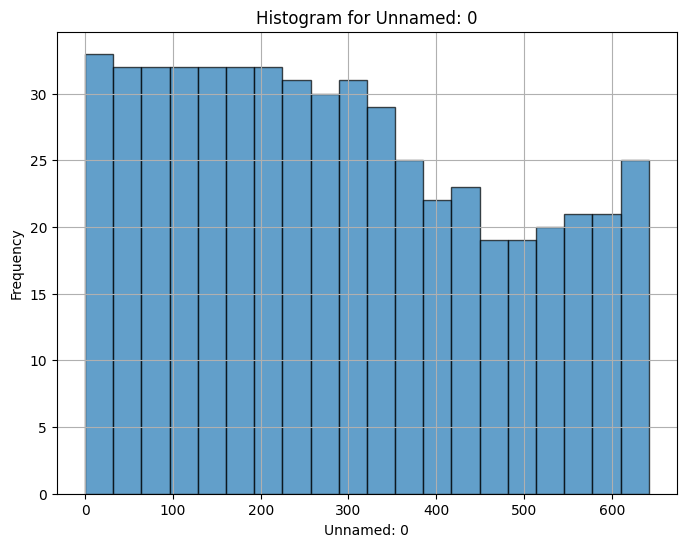

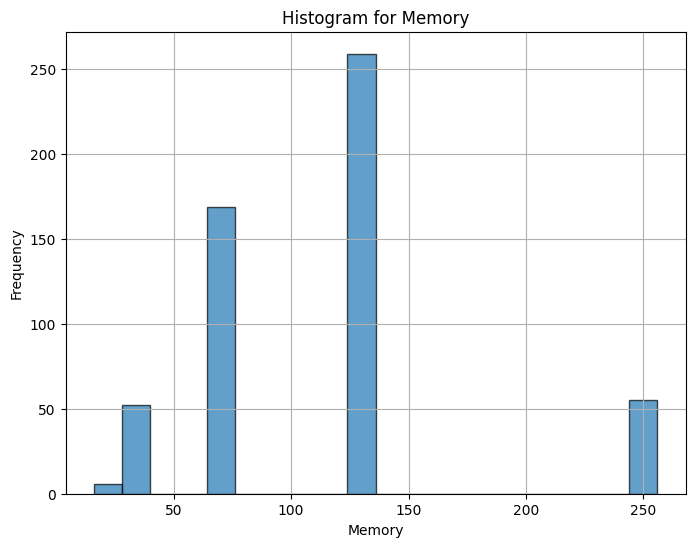

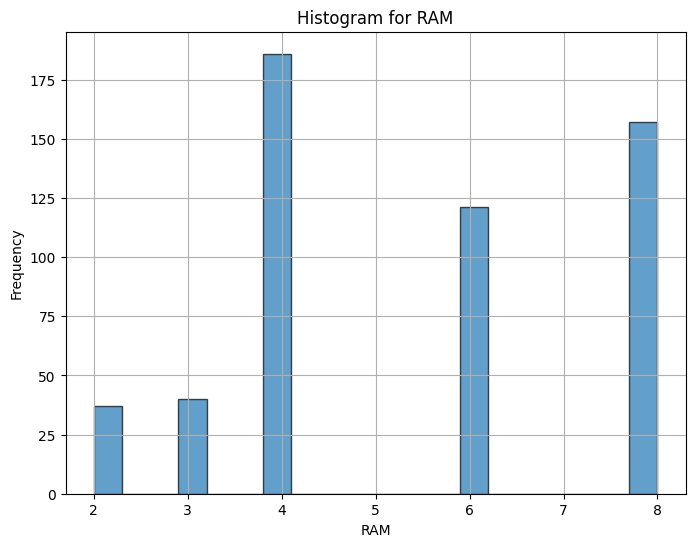

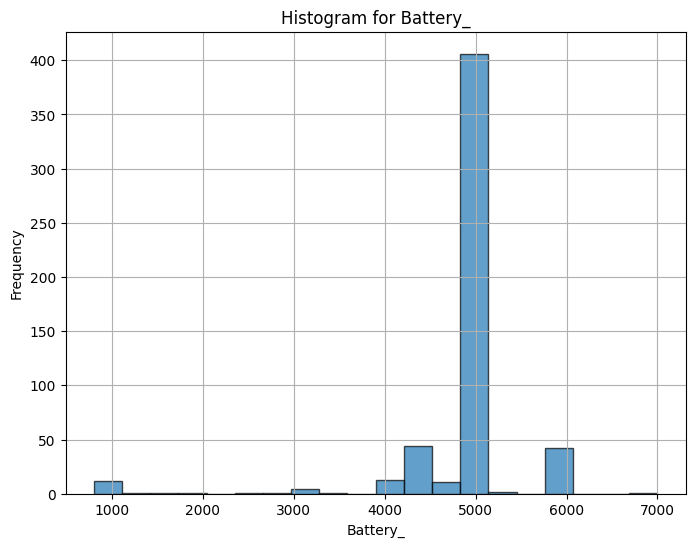

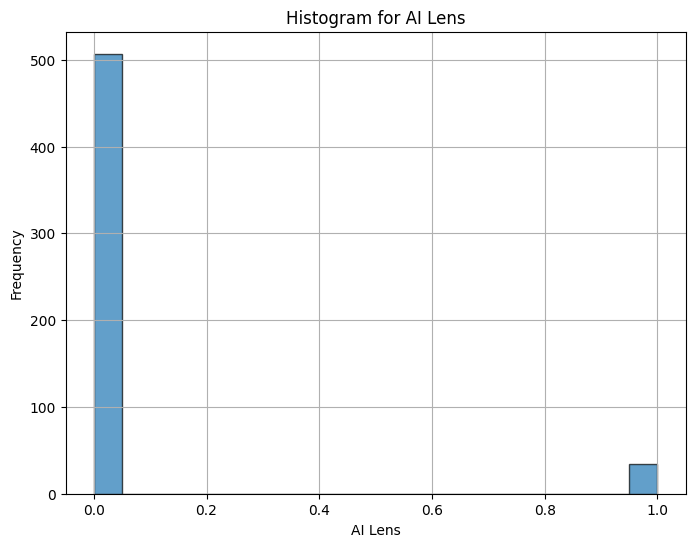

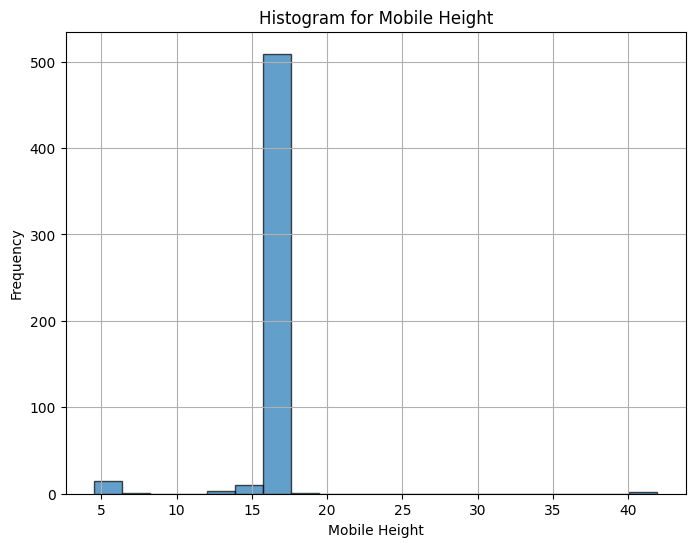

In [30]:
# Visualize data using histograms
for column in num_col:
    plt.figure(figsize=(8, 6))
    plt.hist(data[column], bins=20, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

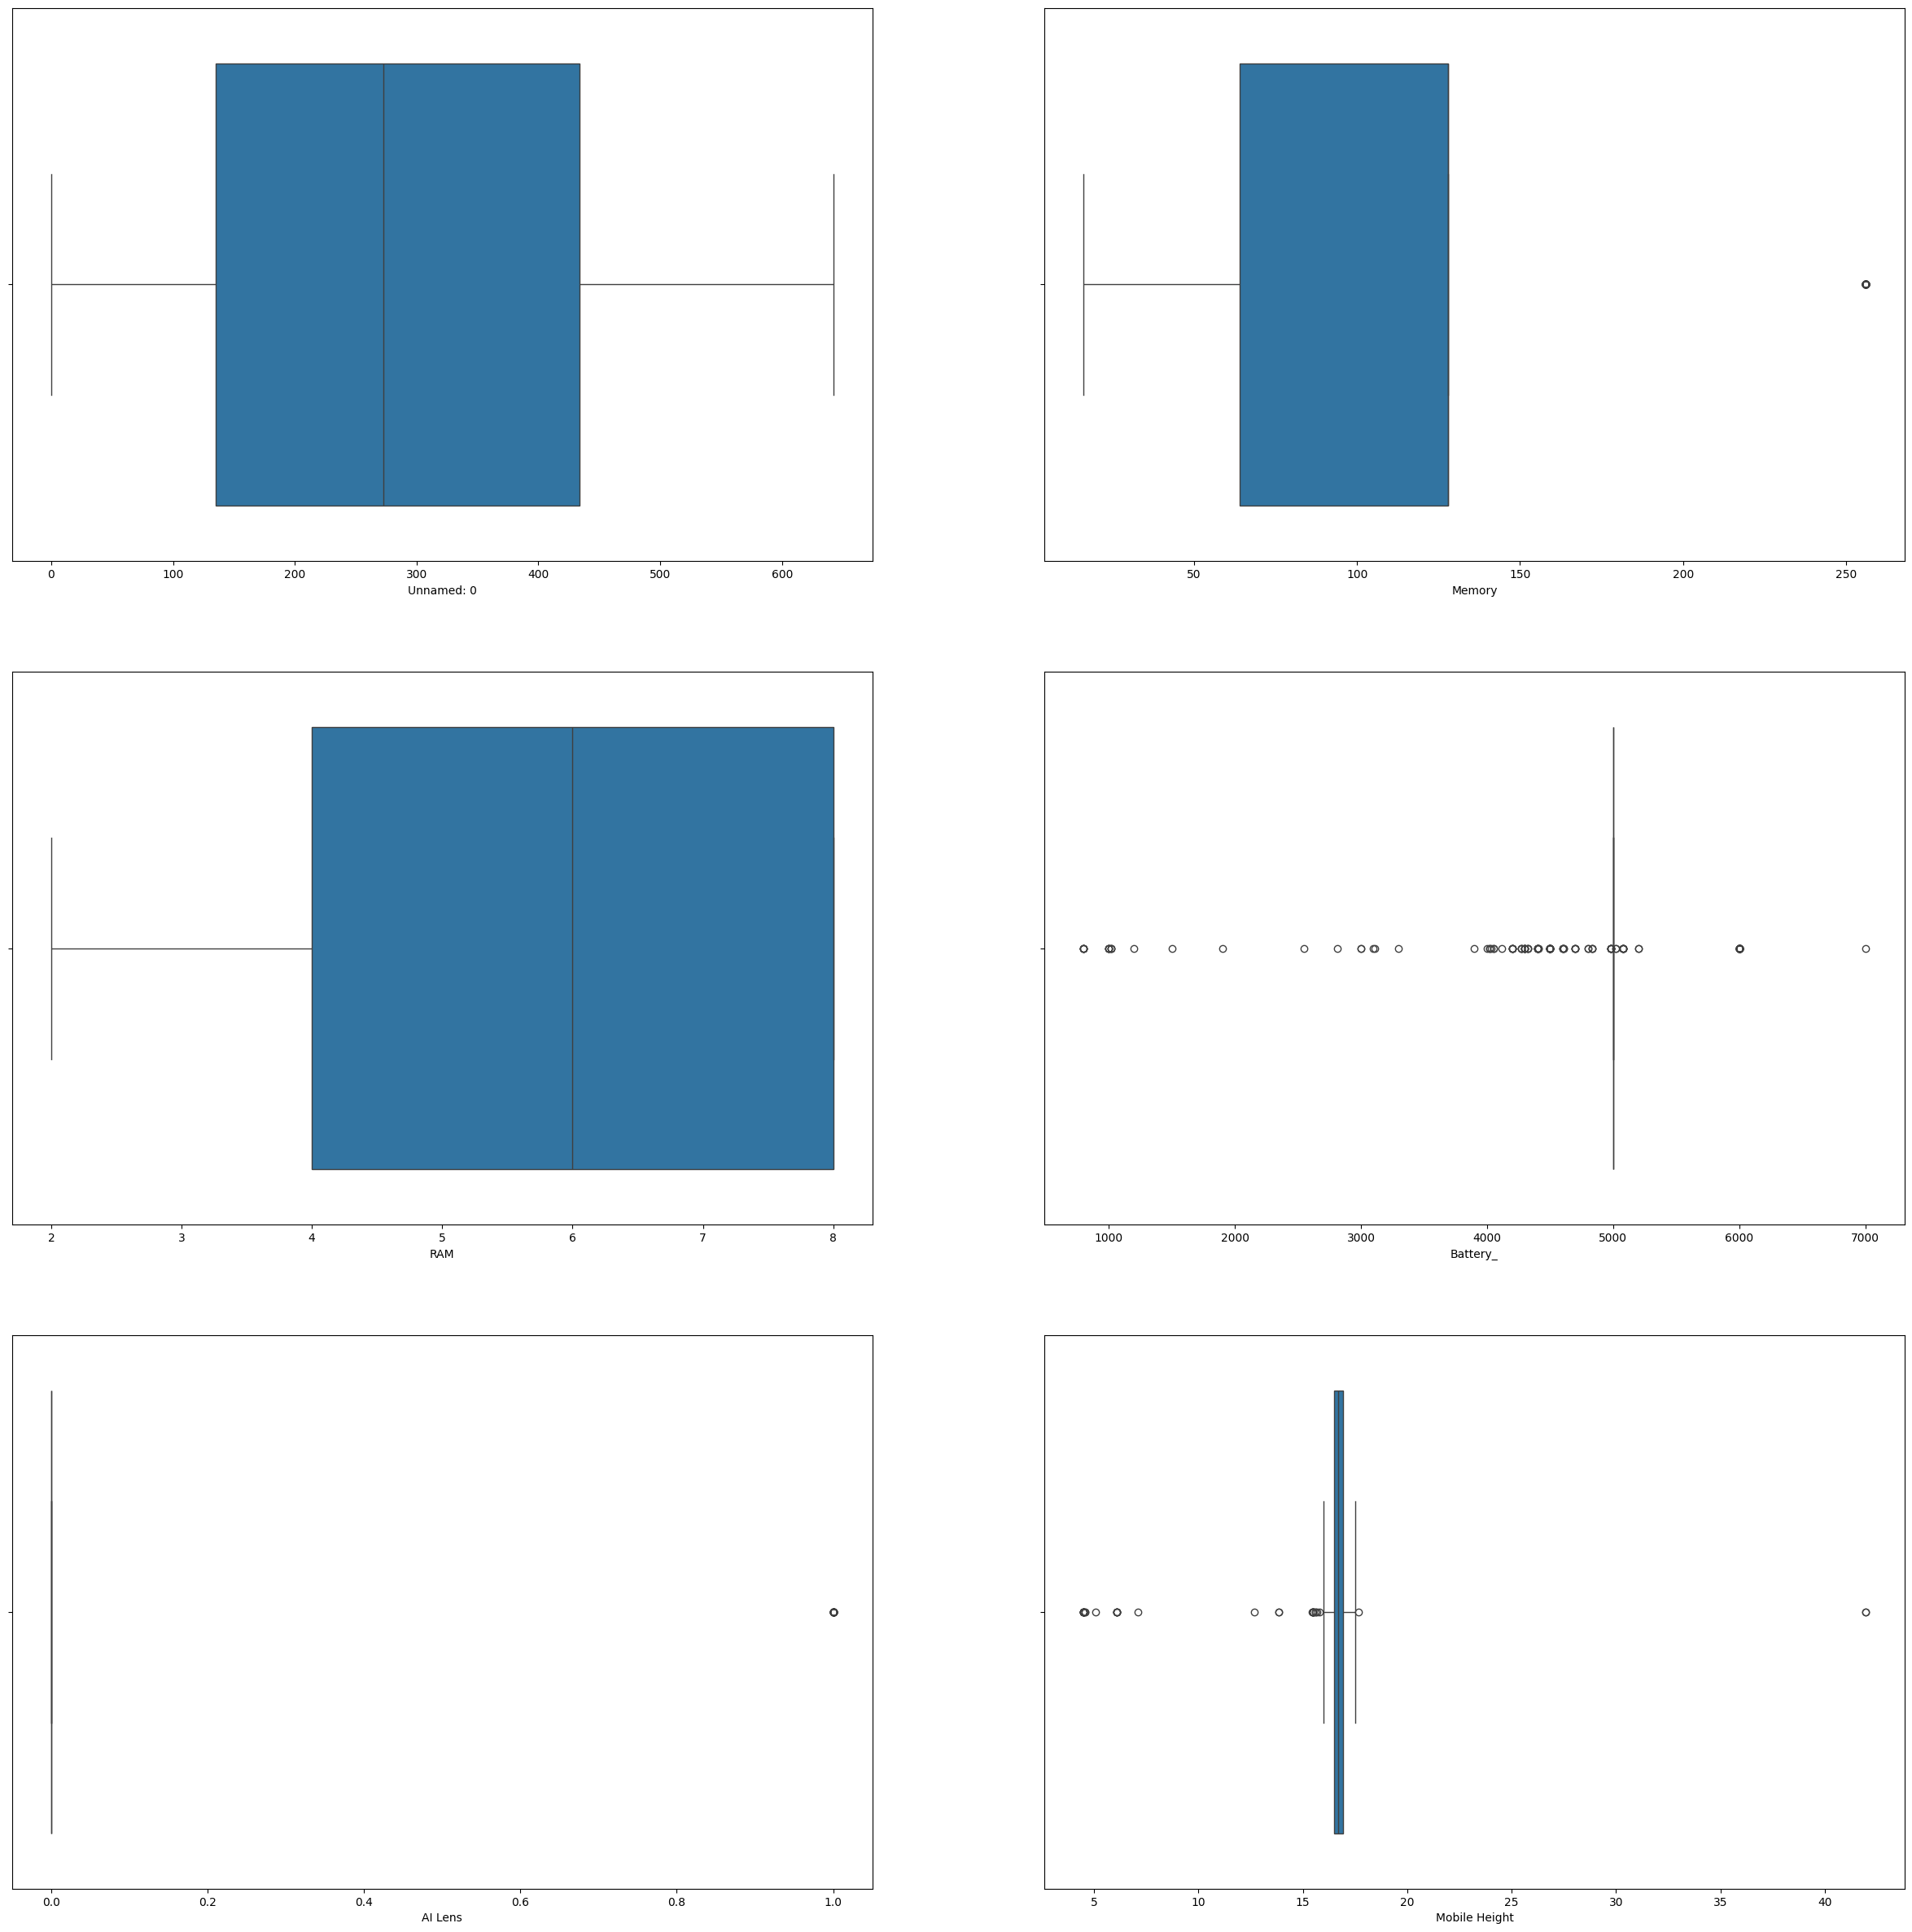

In [31]:
#  Create the plot grid
rows = 3
columns = 2

fig, axes = plt.subplots(rows,columns, figsize=(30,30))

x, y = 0, 0

for i, column in enumerate(num_col):
    sns.boxplot(x=data[column], ax=axes[x, y])

    if y < columns-1:
        y += 1
    elif y == columns-1:
        x += 1
        y = 0
    else:
        y += 1

        plt.show()

# **Data Preprocessing:**

**Missing Values**

In [89]:
data.isnull().sum()

Model              0
Colour             0
Memory            55
RAM                0
Battery_         152
Rear Camera        0
Front Camera       0
AI Lens           34
Mobile Height     33
Processor_         0
Prize              0
dtype: int64

In [90]:
# Check for duplicates
data.duplicated().sum()

10

In [91]:
# Remove duplicates in-place
data.drop_duplicates(inplace=True)

In [92]:
# Handle missing values
data['Memory'] = data['Memory'].fillna(data['Memory'].mean())
data['Battery_'] = data['Battery_'].fillna(data['Battery_'].mean())
data['AI Lens'] = data['AI Lens'].fillna(data['AI Lens'].median())
data['Mobile Height'] = data['Mobile Height'].fillna(data['Mobile Height'].median())



In [93]:
# Check for remaining missing values
missing_values = data.isnull().sum()
print(missing_values)

Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64


In [94]:
# Drop the "Unnamed: 0" column
data = data.drop(columns=['Unnamed: 0'])

KeyError: "['Unnamed: 0'] not found in axis"

In [95]:
# Save the cleaned data back to a CSV file
cleaned_file_path = 'Cleaned_Flipdata.csv'
data.to_csv(cleaned_file_path, index=False)

In [96]:
data.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera',
       'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_', 'Prize'],
      dtype='object')

In [97]:
num_cols=data.select_dtypes(include=['int64', 'float'])

**Outliers**

In [98]:
outliers = {}  # Dictionary to store column names with outliers

for column in num_cols:
    # Calculate quartiles
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Find outliers
    outlier_indices = data[(data[column] < Q1 - 1.5 * IQR) | (data[column] > Q3 + 1.5 * IQR)].index

    if len(outlier_indices) > 0:
        outliers[column] = outlier_indices

# Print column names with outliers
if outliers:
    print("Columns with potential outliers:")
    for column, indices in outliers.items():
        print(f"{column}: {len(indices)} outliers")
else:
    print("No outliers found in any column.")



Columns with potential outliers:
Mobile Height: 4 outliers


In [99]:
# Function to remove outliers from a column using IQR method
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    return column[(column >= Q1 - 1.5 * IQR) & (column <= Q3 + 1.5 * IQR)]

# Dictionary to store information about removed outliers
removed_outliers_info = {}

# Iterate over each numerical column
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    # Count rows before outlier removal
    rows_before = len(data)

    # Remove outliers from the column
    data[column] = remove_outliers(data[column])

    # Count rows after outlier removal
    rows_after = len(data)

    # Calculate number of outliers removed
    outliers_removed = rows_before - rows_after

    # Store information about removed outliers
    removed_outliers_info[column] = outliers_removed

# Display information about removed outliers
print("Outliers Removed:")
for column, removed_count in removed_outliers_info.items():
    print(f"{column}: {removed_count}")


  # to save the cleaned data CSV file
cleaned_data_file_path = 'cleaned_data_with_no_ouliers.csv'

# Save cleaned data to CSV
data.to_csv(cleaned_data_file_path, index=False)

print(f"Cleaned data saved to {cleaned_data_file_path}")

Outliers Removed:
Memory: 0
RAM: 0
Battery_: 0
AI Lens: 0
Mobile Height: 0
Cleaned data saved to cleaned_data_with_no_ouliers.csv


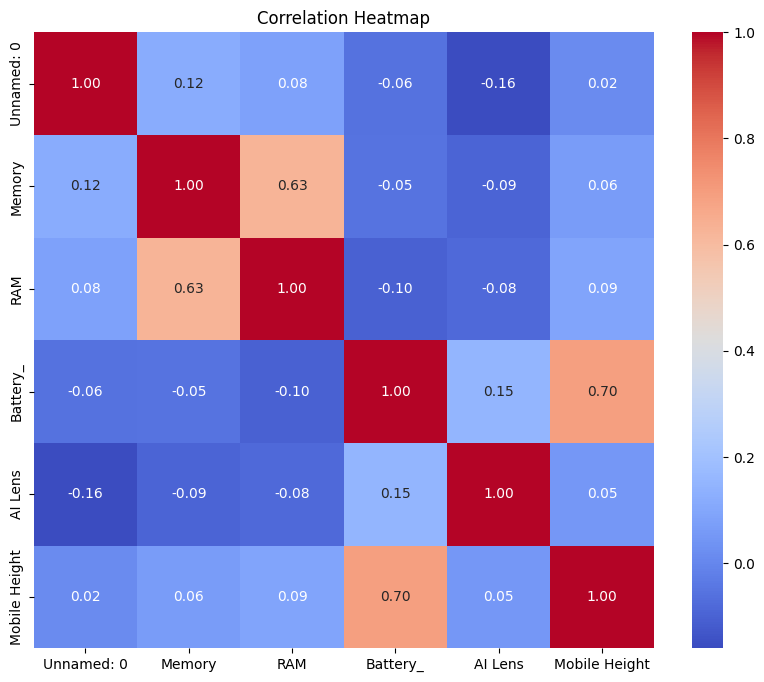

In [100]:
# Calculate the correlation matrix
correlation_matrix=num_col.corr()
correlation_matrix
# Create a heatmap for the num cols
plt.figure(figsize=(10, 8))
sns.heatmap(num_col.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Convert categorical variables (e.g., model, colour) into a suitable numerical format, such as one-hot encoding.**


In [101]:
# Identify columns of type 'object' (categorical)
categorical_cols = data.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_cols)




In [102]:
data_encoded

,Memory,RAM,Battery_,AI Lens,Mobile Height,Model_APPLE iPhone 11,Model_APPLE iPhone 12,Model_APPLE iPhone 14 Plus,Model_Google Pixel 6a,Model_Google Pixel 7,...,"Prize_9,104","Prize_9,290","Prize_9,349","Prize_9,387","Prize_9,499","Prize_9,699","Prize_9,790","Prize_9,990","Prize_9,999",Prize_920
0,64.000000,4,5000.0,0.0,16.76,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,64.000000,4,5000.0,0.0,16.76,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,128.000000,8,5000.0,0.0,16.64,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,32.000000,2,5000.0,0.0,16.56,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,128.000000,8,5000.0,0.0,16.76,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,94.151261,8,5000.0,0.0,16.76,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
537,32.000000,2,5000.0,0.0,16.76,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
538,64.000000,4,5000.0,0.0,16.76,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
539,128.000000,8,5000.0,0.0,16.26,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
